In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Problem: Predict the class of the flower based on available attributes.

In [2]:
iris=pd.read_csv(r"C:\Users\ABRAHAM\Desktop\iris.csv")

In [3]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [4]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.shape

(150, 5)

In [7]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

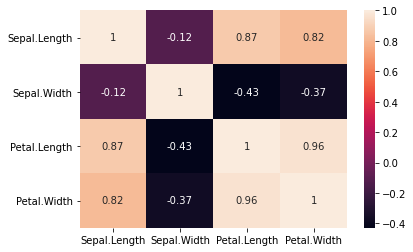

In [8]:
correlation =iris.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

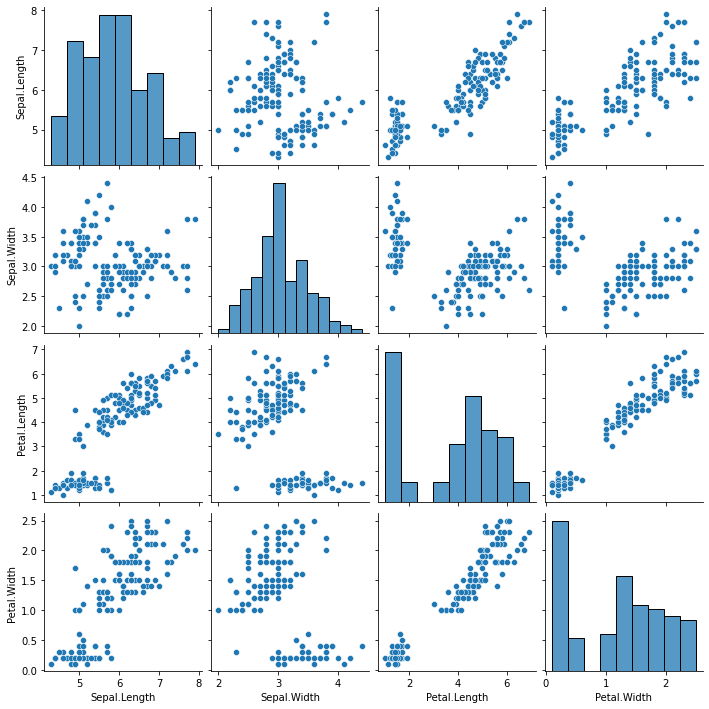

In [9]:
sns.pairplot(iris)

C:\Users\ABRAHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sepal.Length', ylabel='Density'>

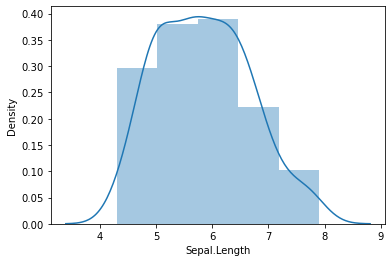

In [10]:
sns.distplot(iris["Sepal.Length"],bins=5)

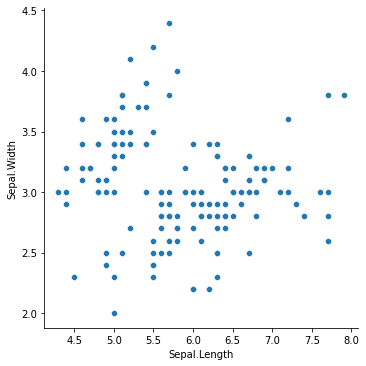

In [11]:
sns.relplot(x="Sepal.Length",y="Sepal.Width",data=iris)

In [12]:
#Label encode target variable
encode=LabelEncoder()
iris.Species = encode.fit_transform(iris.Species)

In [13]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
train,test=train_test_split(iris,test_size=0.3)

In [15]:
#seperate target and independent variable
train_x=train.drop(columns=["Species"],axis=1)
train_y=train["Species"]

test_x=test.drop(columns=["Species"],axis=1)
test_y=test["Species"]

In [16]:
#create object of the model

model= LogisticRegression()

model.fit(train_x,train_y)

predict = model.predict(test_x)

print("predicted values on test data",encode.inverse_transform(predict))

print(accuracy_score(predict,test_y))

predicted values on test data ['versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica'
 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'setosa']
0.9111111111111111
